In [1]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *
import GPy

import sklearn.decomposition
import scipy
import matplotlib.pyplot as plt
np.random.seed(101)
%matplotlib inline

from tqdm import tqdm

In [2]:
parameters['i_end'] = 988
parameters['field_name'] = "Tracer"
parameters

{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


In [ ]:
def human_subset(loc_df, h):
    
    
    human_selection = []
    return human_selection

In [10]:
main_df = loc_df.copy()

In [60]:
main_df.loc[:,'Xr'] = pd.cut(main_df.loc[:,'X'],bins=20)
main_df.loc[:,'Yr'] = pd.cut(main_df.loc[:,'Y'],bins=20)
min_surface = main_df.groupby(['Xr','Yr']).min()

In [64]:
min_surface.Z

Xr                    Yr                  
(-360.404, -323.716]  (-338.8, -304.311]      0.2
                      (-304.311, -270.499]    0.2
                      (-270.499, -236.687]    0.2
                      (-236.687, -202.874]    0.2
                      (-202.874, -169.062]    0.2
                      (-169.062, -135.249]    0.2
                      (-135.249, -101.437]    0.2
                      (-101.437, -67.625]     0.2
                      (-67.625, -33.812]      0.2
                      (-33.812, 0.0]          0.2
                      (0.0, 33.812]           0.2
                      (33.812, 67.625]        0.2
                      (67.625, 101.437]       0.2
                      (101.437, 135.249]      0.2
                      (135.249, 169.062]      0.2
                      (169.062, 202.874]      0.2
                      (202.874, 236.687]      0.2
                      (236.687, 270.499]      0.2
                      (270.499, 304.311]      0.2
       

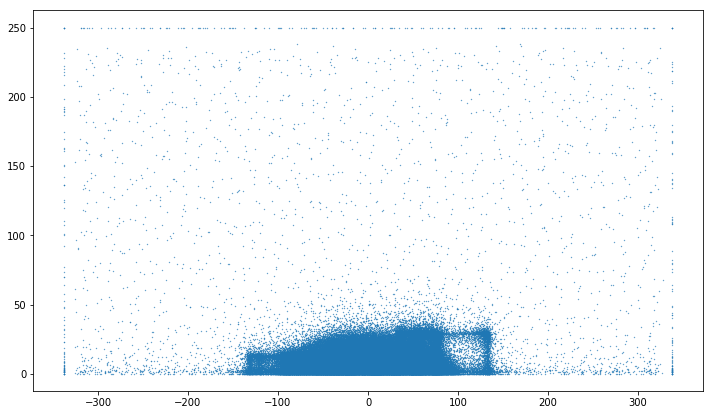

In [100]:
plt.figure(figsize=(12,7))
cond = ( -100 <= loc_df.X) & (loc_df.X <= 100)
plt.scatter(loc_df.Y[cond],loc_df.Z[cond],s=0.1)

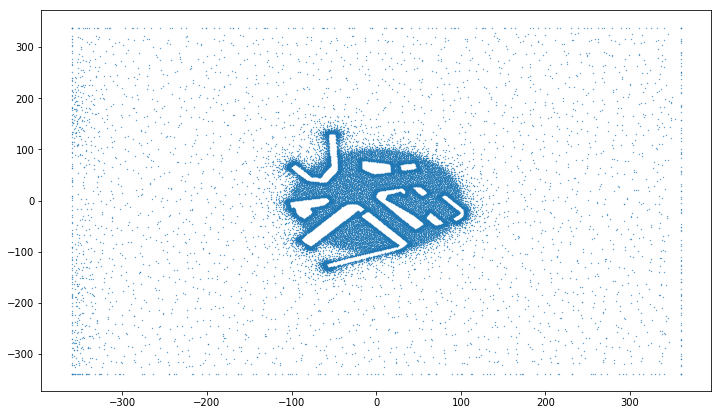

In [97]:
plt.figure(figsize=(12,7))
cond = (loc_df.Z <= 5)
plt.scatter(loc_df.X[cond],loc_df.Y[cond],s=0.1)

In [96]:
np.sum(cond)

33296

In [265]:
def set_to_onehot(A,n):
    """Function that maps a list of points to a one hot encoding of selected points"""
    A_list = np.zeros((n,1))
    A_list[A] = 1
    return A_list

In [271]:
A_list = set_to_onehot(A,data_df.shape[0])
save_vtu(ref_vtu[0],'WorkingSelection10-4.vtu',A_list)

==> Saved to : ../data/temp_data/LSBU_res_2019:07:08-17:41:27_WorkingSelection10-4.vtu
